In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

# Read the CSV file
csv_file_path = 'bme_data_test_humidity.csv' #Location Data File - Same location as this jupyther notebook file
df = pd.read_csv(csv_file_path, names=['timestamp', 'temperature', 'humidity', 'pressure'])

# Convert the 'timestamp' column from epoch to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Calculate the relative minutes after the first measurement
df['relative_minutes'] = (df['timestamp'] - df['timestamp'].min()) / pd.Timedelta('1 minute')

# The CSV columns are named 'timestamp', 'temperature', 'humidity', 'pressure'
time_data = df['relative_minutes']
temperature_data = df['temperature']
humidity_data = df['humidity']

# Function to calculate average between intervals
def calculate_cycle_average(time_data, humidity_data, start, end):
    soma = 0
    contador = 0
    
    for x in time_data:
        if start <= x <= end:
            contador += 1
            soma += np.interp(x, time_data, humidity_data)
    
    if contador == 0:
        return 0  # To avoid division by zero
    return soma / contador

# Calculate averages for the three different cycles
average_20_percent_cycle = calculate_cycle_average(time_data, humidity_data, 4, 23)
average_40_percent_cycle = calculate_cycle_average(time_data, humidity_data, 40, 60)
average_80_percent_cycle = calculate_cycle_average(time_data, humidity_data, 64, 84)

# Display the calculated averages
markdown_content = f"""
### Cycle Averages
**Average of the 20% Cycle:** {average_20_percent_cycle:.2f}%

**Average of the 40% Cycle:** {average_40_percent_cycle:.2f}%

**Average of the 80% Cycle:** {average_80_percent_cycle:.2f}%
"""
display(Markdown(markdown_content))


### Cycle Averages
**Average of the 20% Cycle:** 20.75%

**Average of the 40% Cycle:** 42.34%

**Average of the 80% Cycle:** 73.86%


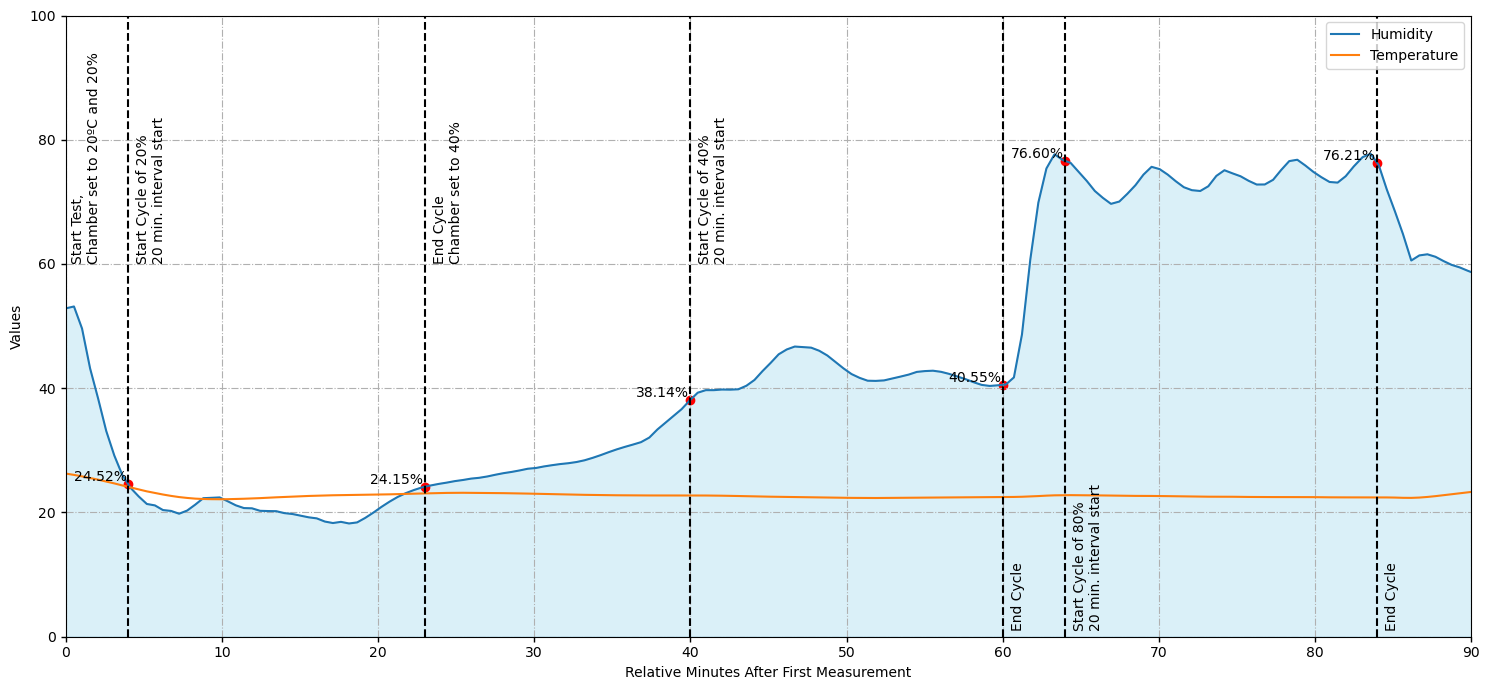

In [133]:
#Plot the data
plt.figure(figsize=(15, 7))

# Humidity plot using interpolated line with relative minutes
plt.plot(time_data, humidity_data, label='Humidity')
plt.plot(time_data, temperature_data, label='Temperature')
plt.fill_between(time_data, humidity_data, color='skyblue', alpha=0.3) # Fill the area under the line

plt.grid(True, linestyle='-.')
plt.tick_params(labelcolor='black', labelsize='medium', width=1)
plt.xlabel('Relative Minutes After First Measurement')
plt.ylabel('Values')

# Set y-axis limits
plt.ylim(0, 100)
plt.xlim(0, 90)

plt.text(0.3, 60, "Start Test,\nChamber set to 20ºC and 20%", rotation=90, verticalalignment='bottom')

# Interesting Points: The reading manual intervals looking to the chamber
interesting_points = [
    (4, "Start Cycle of 20%\n20 min. interval start"),
    (23, "End Cycle\nChamber set to 40%"),
    (40, 'Start Cycle of 40%\n20 min. interval start'),
    (60, "End Cycle"),
    (64, "Start Cycle of 80%\n20 min. interval start"),
    (84, "End Cycle")
]

for x, text in interesting_points:
    plt.axvline(x=x, color='black', linestyle='--')
    # Find the y-value at the intersection
    y_intersection = np.interp(x, time_data, humidity_data)
    plt.scatter(x, y_intersection, color='red') # Mark the intersection point
    # Display the value on the y-axis
    if x < 50:
        plt.text(x+0.5, 60, f"{text}", rotation=90, verticalalignment='bottom')
        plt.text(x-3.5, y_intersection, f"{y_intersection:.2f}%", rotation=0, verticalalignment='bottom')
    elif 50 <= x < 85:
        plt.text(x+0.5, 1, f"{text}", rotation=90, verticalalignment='bottom')
        plt.text(x-3.5, y_intersection, f"{y_intersection:.2f}%", rotation=0, verticalalignment='bottom')
    else:
        plt.text(x-1, 1, f"{text}", rotation=90, verticalalignment='bottom')
        plt.text(x-3.5, y_intersection, f"{y_intersection:.2f}%", rotation=0, verticalalignment='bottom')

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()